# Нейронная сеть с нуля: Keras

### Импорт основных библиотек

In [3]:
"""%tensorflow_version 2.x"""

'%tensorflow_version 2.x'

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

"""%matplotlib inline"""

import matplotlib.pyplot as plt

import tensorflow as tf

import numpy as np

В рамках проекта мы работаем с набором данных Fashion MNIST.
Это словарик нам нужен для того, чтобы перевести численные значения в название.

In [14]:
names_dict = {0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'}

### Загружаем необходимые данные, смотрим как они выглядят и обрабатываем их

In [12]:
# загрузка тренировачных и тестовых данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# конвертация числе из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255
x_test /= 255

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

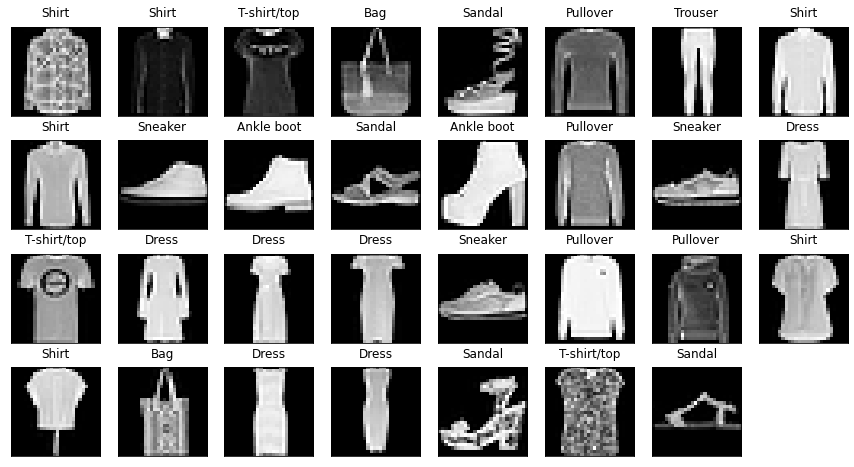

In [15]:
some_samples = x_train[32:63, ...]
some_lab = y_train[32:63, ...]

fig = plt.figure(figsize=(15, 8))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j,:,:,0], cmap='gray')
    ax.set_title(names_dict[some_lab[j]], pad=10)
    plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
# трансформация лейблов в one-hot encoding

ex = 1

print(f'Исходный вид данных для объекта №{ex} - {names_dict[y_train[ex]]} : {y_train[ex]}')
y_train = to_categorical(y_train, 10)

print(f'Новый вид данных для объекта №{ex} : {y_train[ex]}')
y_test = to_categorical(y_test, 10)

Исходный вид данных для объекта №1 - T-shirt/top : 0
Новый вид данных для объекта №1 : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Готовим нейронную сеть и обучаем её

In [25]:
from tensorflow.keras.models import Model

# инициализация модели
input1 = layers.Input(shape=(28, 28, 1))

# первый сверточный слой
x1 = layers.Conv2D(6, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='same')(input1)

# второй пуллинговый слой
x2 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x1)

# третий сверточный слой
x3 = layers.Conv2D(16, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='same')(x2)

# четвертый пуллинговый слой
x4 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x3)

# пятый слой
x5 = layers.Conv2D(120, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='same')(x4)

# четвертый пуллинговый слой
x6 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x5)

# пятый слой
x7 = layers.Conv2D(120, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='same')(x6)

#сглаживаение CNN выхода, чтобы можно было его просоединить к полносвязному слою
x12 = layers.Flatten()(x7)

# шестой полносвязный слой
x13 = layers.Dense(84, activation='tanh')(x12)

# выходной слой с функцией активации softmax
out_x = layers.Dense(10, activation='softmax')(x13)

# Соберем полную модель сети от входа к выходу
model1 = Model(inputs=input1, outputs=out_x)
# сделаем несколько промежуточный выходов (через них посмотрим, что происходит в сети)
model3 = Model(inputs=input1, outputs=x3)
model5 = Model(inputs=input1, outputs=x5)
# компиляция модели
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

# Обучаем модель
hist = model1.fit(x=x_train, y=y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model1.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
469/469 [==============================] - 15s 31ms/step - loss: 1.3742 - accuracy: 0.5496 - val_loss: 0.9455 - val_accuracy: 0.6608
Epoch 2/5
469/469 [==============================] - 19s 40ms/step - loss: 0.8358 - accuracy: 0.7109 - val_loss: 0.7790 - val_accuracy: 0.7273
Epoch 3/5
469/469 [==============================] - 20s 42ms/step - loss: 0.7237 - accuracy: 0.7404 - val_loss: 0.7131 - val_accuracy: 0.7388
Epoch 4/5
469/469 [==============================] - 20s 43ms/step - loss: 0.6763 - accuracy: 0.7520 - val_loss: 0.6824 - val_accuracy: 0.7499
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.6564 - accuracy: 0.7547
Test loss 0.6564, accuracy 75.47%


In [28]:
model1.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d_9 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 16)        880       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 120)         17400     
_________________________________________________________________
average_pooling2d_11 (Averag (None, 3, 3, 120)         0   

### Тестируем работу сети

In [50]:
def test_item(sample):
    logits = model1(sample[None, ...])[0]
    prediction = tf.nn.softmax(logits)
    ans = np.argmax(prediction)
    
    fig = plt.figure(figsize=(12,4))
    
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample[:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])
    
    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1,10])
    ax.grid(True)
    
    plt.show()
    
    print(f'Объект {names_dict[ans]}')
    print('Pridected: {}'.format(ans))

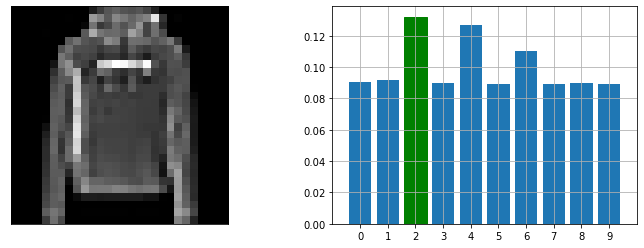

Объект Pullover
Pridected: 2
True Answer: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [54]:
import random
idx = random.randint(0, x_test.shape[0])
sample = x_test[idx, ...]
test_item(sample)

print('True Answer: {}'.format(y_test[idx]))


In [56]:
names_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}